In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/dacon_corona/corona_dataset')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 데이터 준비 
사용하는 데이터 : case, patientInfo, patientRoute


In [3]:
case = pd.read_csv('Case.csv')
print(case.shape)
case.head()

(112, 8)


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [0]:
p_info = pd.read_csv('PatientInfo.csv')
print(p_info.shape)
p_info.tail()


In [0]:
p_route = pd.read_csv('PatientRoute.csv')
print(p_route.shape)
p_route.head()

## 해외유입자 중 확진자

In [38]:
case[case.infection_case=='overseas inflow']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
8,1000009,Seoul,-,False,overseas inflow,313,-,-
17,1100007,Busan,-,False,overseas inflow,21,-,-
26,1200007,Daegu,-,False,overseas inflow,21,-,-
30,1300002,Gwangju,-,False,overseas inflow,20,-,-
35,1400003,Incheon,-,False,overseas inflow,47,-,-
41,1500004,Daejeon,-,False,overseas inflow,9,-,-
45,1600002,Ulsan,-,False,overseas inflow,15,-,-
51,1700004,Sejong,-,False,overseas inflow,3,-,-
60,2000007,Gyeonggi-do,-,False,overseas inflow,213,-,-
66,3000004,Gangwon-do,-,False,overseas inflow,14,-,-


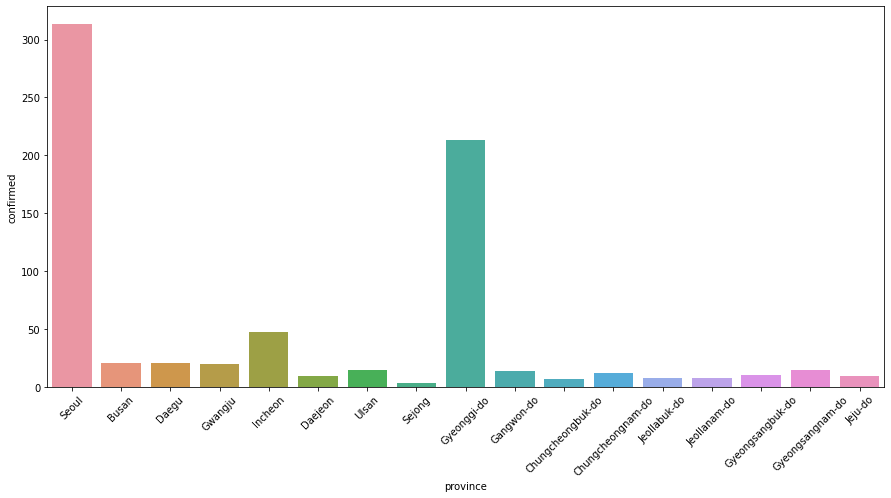

In [41]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.barplot(data= case[case.infection_case=='overseas inflow'],x= 'province',y='confirmed')

- 해외 유입된 확진자는 서울거주자가 가장 많다
- 외국인도 서울에 거주하면 서울거주자로 포함된다
- 남부쪽은 해외 입국자들에 의한 감염은 많이 발생하진 않은것 같다


## 해외 유입된 환자 거주지역

In [0]:
p_os = p_info[p_info.infection_case=='overseas inflow']

In [50]:
p_os.province.value_counts()

Seoul                249
Gyeonggi-do          144
Incheon               38
Busan                 25
Gyeongsangnam-do      15
Gwangju               14
Gyeongsangbuk-do      13
Chungcheongnam-do     11
Ulsan                 11
Daejeon                9
Jeju-do                8
Gangwon-do             8
Jeollabuk-do           8
Jeollanam-do           7
Chungcheongbuk-do      4
Sejong                 3
Name: province, dtype: int64

In [54]:
p_os

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,7000000008,9457.0,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,2020-04-12,NaN,released
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


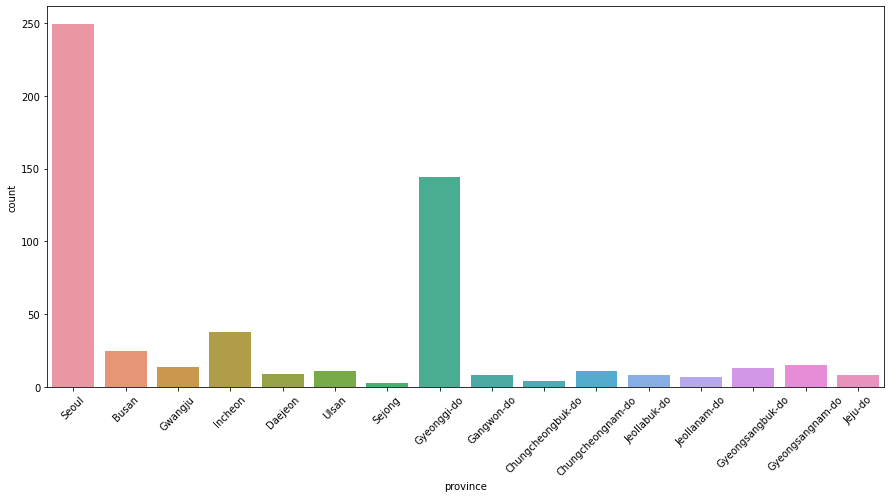

In [52]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.countplot(data = p_os,x= p_os.province)

- 해외 유입된 환자도 당연히 서울이 가장 많다

In [48]:
p_os.country.value_counts()

Korea            548
United States      6
China              6
France             1
Switzerland        1
Spain              1
Indonesia          1
Canada             1
Foreign            1
Thailand           1
Name: country, dtype: int64

## 입국자 국적

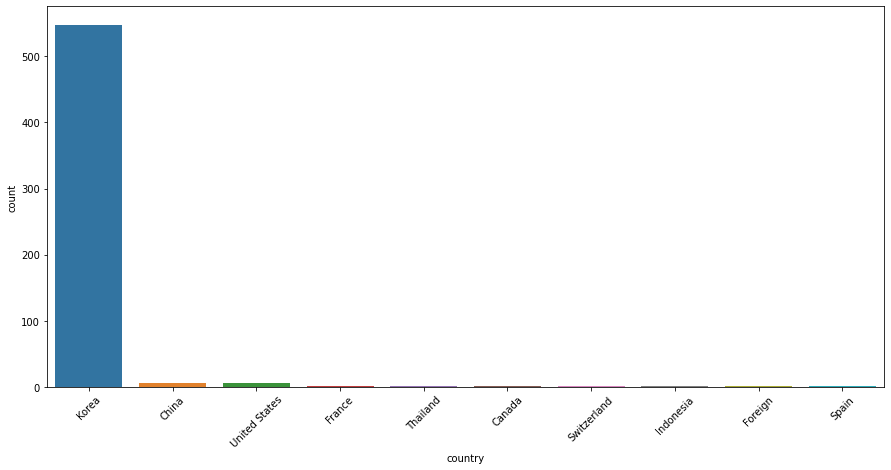

In [55]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.countplot(data = p_os,x= p_os.country)

- 해외 유입된 환자는 대다수 한국인

## 입국자 거주지역별 접촉한 사람수 

In [62]:
p_os[['contact_number']].groupby(p_os.province).sum()

,contact_number
province,
Busan,117.0
Chungcheongbuk-do,0.0
Chungcheongnam-do,20.0
Daejeon,13.0
Gangwon-do,1.0
Gwangju,513.0
Gyeonggi-do,523.0
Gyeongsangbuk-do,0.0
Gyeongsangnam-do,0.0


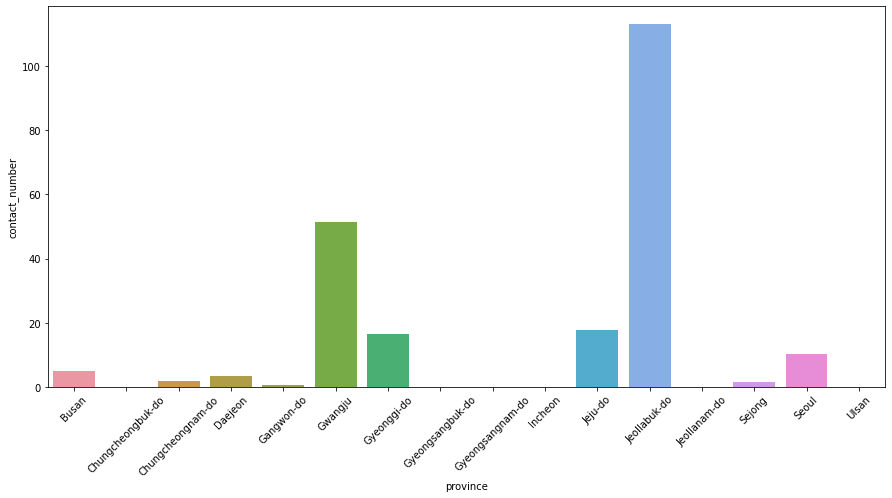

In [88]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.barplot(data=p_os[['contact_number']].groupby(p_os.province).mean(),x=p_os[['contact_number']].groupby(p_os.province).mean().index,y='contact_number')

- 전라북도 거주자들이 평균적으로 가장 활발하게 사람들과 접촉했다
- 특별입국절차를 거친 입국자들인지를 파악해야함


## 입국자에 의한 전염

In [102]:
p_os[p_os.contact_number==450]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
816,1300000001,16.0,female,NaN,40s,Korea,Gwangju,NaN,NaN,overseas inflow,NaN,NaN,450.0,2020-01-27,2020-02-03,2020-02-20,NaN,released


In [150]:
p_info[p_info.infected_by==1300000001]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
817,1300000002,18.0,female,NaN,20s,Korea,Gwangju,NaN,NaN,contact with patient,NaN,1.300000e+09,8.0,NaN,2020-02-05,2020-02-20,NaN,released
1960,5100000001,22.0,male,1974.0,40s,Korea,Jeollanam-do,etc,NaN,contact with patient,NaN,1.300000e+09,1.0,NaN,2020-02-06,2020-02-15,NaN,released


In [0]:
contact_os = p_os[p_os.contact_number.notnull()]

In [0]:
contact_df = pd.DataFrame()
for i in contact_os.patient_id:
    a= p_info[p_info.infected_by==i]
    contact_df = pd.concat([contact_df,a])


In [157]:
p_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [173]:
print(len(contact_df))
contact_df

26


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
402,1000000403,9571.0,female,1980.0,30s,Korea,Seoul,Dongjak-gu,NaN,contact with patient,NaN,1.000000e+09,NaN,NaN,2020-03-28,NaN,NaN,released
482,1000000483,9946.0,male,1982.0,30s,Korea,Seoul,Seocho-gu,NaN,contact with patient,NaN,1.000000e+09,NaN,2020-03-27,2020-04-01,NaN,NaN,isolated
512,1000000513,10115.0,female,1955.0,60s,Korea,Seoul,Gangnam-gu,NaN,contact with patient,NaN,1.000000e+09,1.0,NaN,2020-04-03,NaN,NaN,isolated
559,1000000560,10275.0,female,1954.0,60s,Korea,Seoul,Songpa-gu,NaN,contact with patient,NaN,1.000000e+09,NaN,2020-03-23,2020-04-05,NaN,NaN,isolated
619,1000000620,10632.0,NaN,NaN,NaN,Korea,Seoul,Gangnam-gu,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-16,NaN,NaN,isolated
532,1000000533,10222.0,female,1994.0,20s,Korea,Seoul,Dongjak-gu,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-03,NaN,NaN,isolated
612,1000000613,10588.0,NaN,NaN,NaN,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,NaN,1.000001e+09,NaN,2020-04-12,2020-04-13,NaN,NaN,isolated
1692,2000000628,10510.0,female,1994.0,20s,Korea,Gyeonggi-do,Hwaseong-si,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-11,NaN,NaN,isolated
817,1300000002,18.0,female,NaN,20s,Korea,Gwangju,NaN,NaN,contact with patient,NaN,1.300000e+09,8.0,NaN,2020-02-05,2020-02-20,NaN,released


In [0]:
contact_os = contact_df[contact_df.contact_number.notnull()]

contact_df2 = pd.DataFrame()
for i in contact_os.patient_id:
    a= p_info[p_info.infected_by==i]
    contact_df2 = pd.concat([contact_df2,a])

In [172]:
contact_df2

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
540,1000000541,10194.0,female,1970.0,50s,Korea,Seoul,Jungnang-gu,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-04,NaN,NaN,isolated
1677,2000000613,10444.0,male,1959.0,60s,Korea,Gyeonggi-do,Uijeongbu-si,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-09,NaN,NaN,isolated
1678,2000000614,10439.0,female,1961.0,60s,Korea,Gyeonggi-do,Uijeongbu-si,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-09,NaN,NaN,isolated
1071,2000000007,20.0,female,1978.0,40s,Korea,Gyeonggi-do,Suwon-si,NaN,contact with patient,3.0,2.000000e+09,2.0,2020-02-04,2020-02-05,2020-02-24,NaN,released
1917,4100000116,NaN,male,1955.0,60s,Korea,Chungcheongnam-do,Hongseong-gun,NaN,overseas inflow,NaN,4.100000e+09,0.0,2020-03-16,2020-03-17,2020-04-03,NaN,released
1919,4100000118,NaN,female,1958.0,60s,Korea,Chungcheongnam-do,Hongseong-gun,NaN,overseas inflow,NaN,4.100000e+09,5.0,NaN,2020-03-17,2020-04-15,NaN,released


In [109]:
p_info[p_info.infected_by.notnull()]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,0.0,NaN,2020-01-31,2020-02-10,NaN,released
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1.000000e+09,6.0,NaN,2020-02-05,2020-02-29,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,6100000082,NaN,male,1963.0,50s,Korea,Gyeongsangnam-do,Geochang-gun,NaN,contact with patient,NaN,6.100000e+09,NaN,NaN,2020-03-07,2020-03-19,NaN,released
3286,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,NaN,6.002000e+09,NaN,2020-03-22,2020-03-23,NaN,NaN,isolated
3308,6100000111,NaN,male,1999.0,20s,Korea,Gyeongsangnam-do,Sacheon-si,NaN,contact with patient,NaN,6.100000e+09,NaN,2020-04-04,2020-04-06,NaN,NaN,isolated
3309,6100000112,NaN,male,1954.0,60s,Korea,Gyeongsangnam-do,Hapcheon-gun,NaN,contact with patient,NaN,6.100000e+09,NaN,2020-04-03,2020-04-07,NaN,NaN,isolated


In [77]:
(p_os[(p_os.confirmed_date>='2020-03-13')&(p_os.confirmed_date<='2020-03-17')])

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
235,1000000236,8053.0,male,1991.0,20s,Korea,Seoul,Nowon-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-13,NaN,NaN,released
236,1000000237,8044.0,female,1998.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,NaN,NaN,NaN,2020-03-11,2020-03-13,NaN,NaN,isolated
246,1000000247,8096.0,male,1969.0,50s,Korea,Seoul,Guro-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-14,NaN,NaN,released
265,1000000266,8271.0,male,1994.0,20s,Korea,Seoul,Yeongdeungpo-gu,NaN,overseas inflow,NaN,NaN,NaN,2020-03-12,2020-03-16,NaN,NaN,isolated
268,1000000269,8359.0,female,1999.0,20s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-17,NaN,NaN,isolated
269,1000000270,8342.0,female,1997.0,20s,Korea,Seoul,etc,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-17,NaN,NaN,released
270,1000000271,8455.0,male,1994.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,NaN,NaN,NaN,2020-03-16,2020-03-17,NaN,NaN,isolated
725,1100000102,NaN,female,1997.0,20s,Korea,Busan,Saha-gu,NaN,overseas inflow,NaN,NaN,9.0,2020-03-13,2020-03-17,NaN,NaN,released
831,1300000016,8141.0,female,NaN,40s,Korea,Gwangju,NaN,NaN,overseas inflow,NaN,NaN,23.0,NaN,2020-03-14,2020-04-10,NaN,released
1005,1600000029,NaN,female,1990.0,30s,Korea,Ulsan,Nam-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-17,2020-04-04,NaN,released


In [0]:
p =pd.merge(p_info,p_route,on='patient_id',how="left")

In [0]:
merge_pos= p[p.infection_case == 'overseas inflow']

In [0]:
merge_pos.patient_id.value_counts()

1400000033    25
1100000112    18
2000000006    14
1000000539    14
1000000357    14
              ..
2000000383     1
2000000384     1
2000000385     1
2000000386     1
2000000577     1
Name: patient_id, Length: 567, dtype: int64

In [0]:
p[p.patient_id==1400000033]

,patient_id,global_num_x,sex,birth_year,age,country,province_x,city_x,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,global_num_y,date,province_y,city_y,type,latitude,longitude
3712,1400000033,8600.0,male,1970.0,50s,Korea,Incheon,Yeonsu-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,isolated,8600.0,2020-03-14,Incheon,Dong-gu,etc,37.491013,126.634487
3713,1400000033,8600.0,male,1970.0,50s,Korea,Incheon,Yeonsu-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,isolated,8600.0,2020-03-14,Seoul,Seocho-gu,etc,37.473198,127.038170
3714,1400000033,8600.0,male,1970.0,50s,Korea,Incheon,Yeonsu-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,isolated,8600.0,2020-03-14,Incheon,Dong-gu,etc,37.491013,126.634487
3715,1400000033,8600.0,male,1970.0,50s,Korea,Incheon,Yeonsu-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,isolated,8600.0,2020-03-15,Incheon,Dong-gu,etc,37.491013,126.634487
3716,1400000033,8600.0,male,1970.0,50s,Korea,Incheon,Yeonsu-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,isolated,8600.0,2020-03-15,Seoul,Seocho-gu,etc,37.473198,127.038170
3717,1400000033,8600.0,male,1970.0,50s,Korea,Incheon,Yeonsu-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,isolated,8600.0,2020-03-15,Incheon,Dong-gu,restaurant,37.491013,126.634487
3718,1400000033,8600.0,male,1970.0,50s,Korea,Incheon,Yeonsu-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,isolated,8600.0,2020-03-15,Incheon,Dong-gu,etc,37.491013,126.634487
3719,1400000033,8600.0,male,1970.0,50s,Korea,Incheon,Yeonsu-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,isolated,8600.0,2020-03-15,Incheon,Dong-gu,etc,37.491013,126.634487
3720,1400000033,8600.0,male,1970.0,50s,Korea,Incheon,Yeonsu-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,isolated,8600.0,2020-03-15,Seoul,Seocho-gu,etc,37.473198,127.038170
3721,1400000033,8600.0,male,1970.0,50s,Korea,Incheon,Yeonsu-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,isolated,8600.0,2020-03-15,Chungcheongnam-do,Asan-si,etc,36.789796,127.001849


In [28]:
policy = pd.read_csv('Policy.csv')
policy.shape

(44, 7)

In [0]:
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious disease alert level,level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious disease alert level,level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious disease alert level,level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious disease alert level,level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [29]:
# 해외유입 환자
p_os =p_info[p_info.infection_case == 'overseas inflow']
print(p_os.shape)

(567, 18)


In [0]:
# 해외유입 case
case_os =case[case.infection_case=='overseas inflow']

In [0]:
ex_pos = p_os[(p_os.confirmed_date<='2020-02-04')]

In [0]:
sip_pos= p_os[(p_os.confirmed_date>='2020-02-04')]

In [32]:
sip_pos

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
10,1000000011,23.0,female,1962.0,50s,China,Seoul,Seodaemun-gu,NaN,overseas inflow,1.0,NaN,23.0,NaN,2020-02-06,2020-02-29,NaN,released
11,1000000012,24.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-07,2020-02-27,NaN,released
26,1000000027,593.0,male,1968.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-02-23,2020-03-04,NaN,released
38,1000000039,924.0,female,1945.0,70s,China,Seoul,Geumcheon-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-02-25,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,7000000008,9457.0,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,2020-04-12,NaN,released
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [0]:
## 

In [33]:
sip_pos.country.value_counts()

Korea            540
United States      6
China              5
France             1
Switzerland        1
Spain              1
Indonesia          1
Canada             1
Foreign            1
Thailand           1
Name: country, dtype: int64

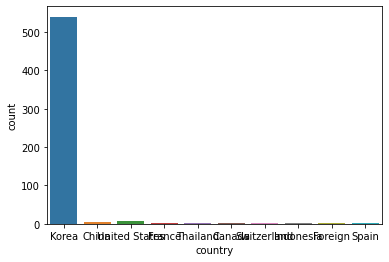

In [34]:
sns.countplot(x=sip_pos.country)

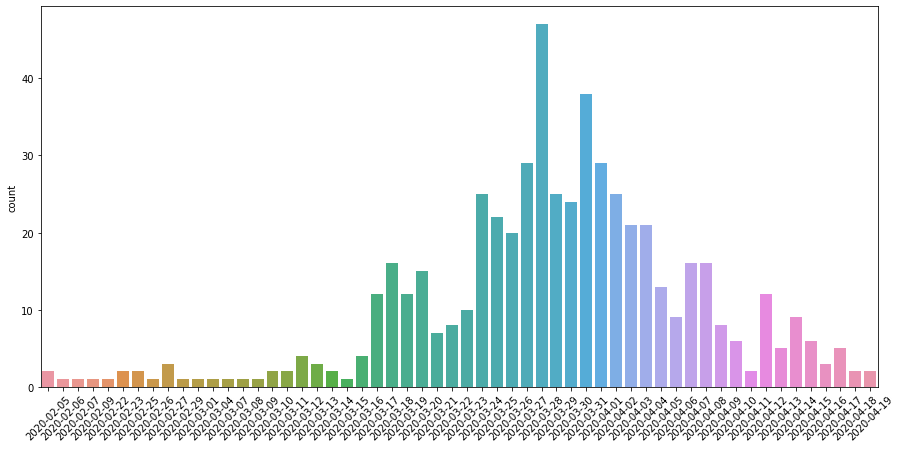

In [0]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.countplot(x= sorted(sip_pos.confirmed_date))

In [0]:
sip_pos.confirmed_date.value_counts()

2020-03-28    47
2020-03-31    38
2020-04-01    29
2020-03-27    29
2020-04-02    25
2020-03-29    25
2020-03-24    25
2020-03-30    24
2020-03-25    22
2020-04-03    21
2020-04-04    21
2020-03-26    20
2020-04-07    16
2020-04-08    16
2020-03-18    16
2020-03-20    15
2020-04-05    13
2020-04-12    12
2020-03-17    12
2020-03-19    12
2020-03-23    10
2020-04-06     9
2020-04-14     9
2020-04-09     8
2020-03-22     8
2020-03-21     7
2020-04-15     6
2020-04-10     6
2020-04-13     5
2020-04-17     5
2020-03-12     4
2020-03-16     4
2020-04-16     3
2020-02-27     3
2020-03-13     3
2020-04-19     2
2020-02-23     2
2020-03-11     2
2020-04-11     2
2020-04-18     2
2020-02-05     2
2020-03-10     2
2020-02-25     2
2020-03-14     2
2020-03-01     1
2020-03-09     1
2020-02-22     1
2020-02-26     1
2020-03-04     1
2020-02-09     1
2020-02-07     1
2020-03-15     1
2020-02-29     1
2020-03-08     1
2020-02-06     1
2020-03-07     1
Name: confirmed_date, dtype: int64

In [4]:
entrance = pd.read_csv('../1911_2003_entrance.csv')
print(entrance.shape)
entrance.head()

(25, 7)


,시점,Unnamed: 1,구주 전체(명),마카오(명),일본(명),중국(명),홍콩(명)
0,201911.0,인천공항,66522,3760,157697,296925,49265
1,NaN,김포공항,3460,10,59157,22157,315
2,NaN,김해공항,6391,739,27619,14205,5547
3,NaN,제주공항,565,372,2404,79893,2998
4,NaN,기타(공항),337,7,2718,5611,26


In [0]:
entrance.rename({'Unnamed: 1':'airport'},axis=1,inplace=True)

In [22]:
entrance['시점'][10:15] = entrance['시점'][10:15].fillna('202001')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
entrance

,시점,airport,구주 전체(명),마카오(명),일본(명),중국(명),홍콩(명)
0,201911,인천공항,66522,3760,157697,296925,49265
1,201911,김포공항,3460,10,59157,22157,315
2,201911,김해공항,6391,739,27619,14205,5547
3,201911,제주공항,565,372,2404,79893,2998
4,201911,기타(공항),337,7,2718,5611,26
5,201912,인천공항,55623,7042,152368,301822,61483
6,201912,김포공항,2015,34,61279,23535,410
7,201912,김해공항,5760,662,31132,12954,4699
8,201912,제주공항,373,599,1973,84104,4987
9,201912,기타(공항),249,0,1735,6596,17
